# Special Features in Notebook

In [1]:
# from traitlets.config.manager import BaseJSONConfigManager
# from pathlib import Path
# path = Path.home() / ".jupyter" / "nbconfig"
# cm = BaseJSONConfigManager(config_dir=str(path))
# cm.update(
#     "rise",
#     {
#         "theme": "night",
#         "transition": "zoom",
#         "start_slideshow_at": "selected",
#      }
# )

I am testing a few special features with Python and Notebook (with RISE slides) for better demonstration and video recording. 

In [2]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
from IPython.display import HTML

plt.rcdefaults()
plt.xkcd(scale=1, length=300, randomness=5)

## XKCD

### And Hide Input (Code)

https://fedebarabas.github.io/blog/jupyter_slides/

Text(0.5, 1.0, 'Programming language usage')

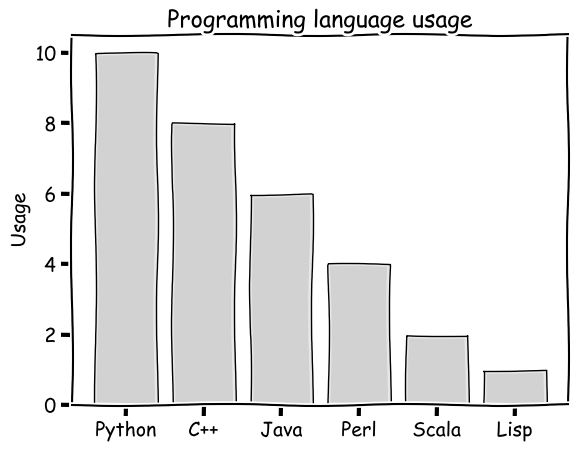

In [9]:
# hide_code_in_slideshow()

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', color=(0.1, 0.1, 0.1, 0.1), edgecolor="black") #, alpha=0.5)
plt.xticks(y_pos, objects)  
plt.ylabel('Usage')
plt.title('Programming language usage')

## Animation

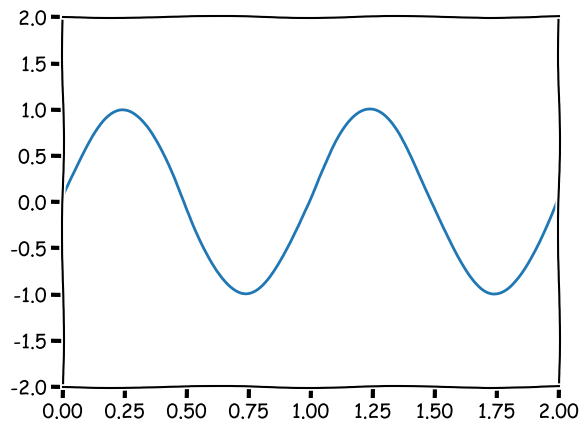

In [4]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)
HTML(anim.to_html5_video())
#HTML(anim.to_jshtml())

## Bar and Animation

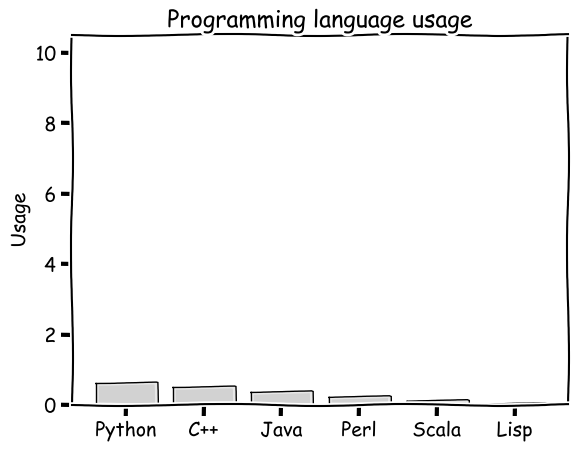

In [10]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
x = np.arange(len(objects))
y = [10,8,6,4,2,1]
# y2 = np.array(y)

def sigmoid(k, n):
    return 1 / (1 + math.exp(k-n))

def linear_cap(n, c):
    return (n if n<c else c)/c
    
# z*sigmoid(10, 2.5*n)
def grow(n): 
    return [z*linear_cap(n, 15) for z in y]

# x = range(1,6)

fig = plt.figure()
bc = plt.bar(x, y, align='center', color=(0.1, 0.1, 0.1, 0.1), edgecolor="black")
plt.xticks(x, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

def animate(i):
    y = grow(i+1)
    for i, b in enumerate(bc):
        b.set_height(y[i])

anim=animation.FuncAnimation(fig, animate, 
                             repeat=False, blit=False,
                             frames=20, interval=500)

In [11]:
HTML(anim.to_html5_video()) 

## Tikzmagic

In [7]:
%load_ext tikzmagic

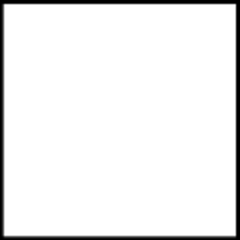

In [8]:
%tikz \draw (0,0) rectangle (1,1);

## References

+ http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/